# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [63]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}



<IPython.core.display.Javascript object>

In [64]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [65]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture

from matplotlib.colors import LogNorm

Load feature names.

In [66]:
feature_names = []
with open('../Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print ('Loaded feature names:', len(feature_names))

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [67]:
X, Y = [], []

with open('../Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print (train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [68]:
def P1(n_components=2):
    
### STUDENT START ###
    print('\n# of PCA: ', n_components)
    print('\n')
    pca_mod = PCA(n_components = n_components)
    pca_mod.fit(train_data)
    
    for k in range(n_components):
        k = k + 1
        print('k =', k, 'Explained Variance = {:.3f}'.format(pca_mod.explained_variance_ratio_[k-1]))
        
### STUDENT END ###

P1(50)


# of PCA:  50


k = 1 Explained Variance = 0.164
k = 2 Explained Variance = 0.133
k = 3 Explained Variance = 0.102
k = 4 Explained Variance = 0.071
k = 5 Explained Variance = 0.039
k = 6 Explained Variance = 0.037
k = 7 Explained Variance = 0.031
k = 8 Explained Variance = 0.027
k = 9 Explained Variance = 0.026
k = 10 Explained Variance = 0.022
k = 11 Explained Variance = 0.020
k = 12 Explained Variance = 0.019
k = 13 Explained Variance = 0.017
k = 14 Explained Variance = 0.017
k = 15 Explained Variance = 0.015
k = 16 Explained Variance = 0.015
k = 17 Explained Variance = 0.014
k = 18 Explained Variance = 0.014
k = 19 Explained Variance = 0.013
k = 20 Explained Variance = 0.011
k = 21 Explained Variance = 0.011
k = 22 Explained Variance = 0.011
k = 23 Explained Variance = 0.010
k = 24 Explained Variance = 0.010
k = 25 Explained Variance = 0.009
k = 26 Explained Variance = 0.009
k = 27 Explained Variance = 0.008
k = 28 Explained Variance = 0.008
k = 29 Explained Variance = 0.007
k = 30

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html


# of PCA:  2
Explained variance ratio: 
 [0.16404331 0.13323479]


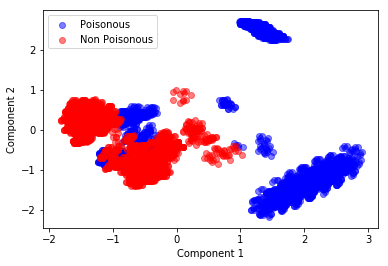

In [69]:
def P2():
    
### STUDENT START ###
    n_comp = 2
    print('\n# of PCA: ', n_comp)
    pca_mod = PCA(n_components = n_comp)
    prin_comp = pca_mod.fit_transform(train_data)
    print ('Explained variance ratio: \n', pca_mod.explained_variance_ratio_) 
    
    poisonous = prin_comp[np.where(train_labels==1)]
    non_poisonous = prin_comp[np.where(train_labels==0)]
    
    pca1 = poisonous[:,0]
    pca2 = poisonous[:,1]
    plt.figure()
    plt.scatter(pca1,pca2,  c='blue',label='Poisonous', alpha=0.5)
    pca1 = non_poisonous[:,0]
    pca2 = non_poisonous[:,1]
    plt.scatter(pca1,pca2,  c='red',label='Non Poisonous', alpha=0.5)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    return prin_comp

### STUDENT END ###

prin_comp = P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.


Number of clusters:  1

Cluster center for cluster number:  1 is [-0.000,0.000]
The radius (max_distance) is 2.989

Number of clusters:  2

Cluster center for cluster number:  1 is [-0.967,-0.182]
The radius (max_distance) is 1.604

Cluster center for cluster number:  2 is [1.675,0.316]
The radius (max_distance) is 2.505

Number of clusters:  3

Cluster center for cluster number:  1 is [-0.950,-0.180]
The radius (max_distance) is 1.963

Cluster center for cluster number:  2 is [1.309,2.464]
The radius (max_distance) is 1.937

Cluster center for cluster number:  3 is [1.989,-1.293]
The radius (max_distance) is 1.587

Number of clusters:  4

Cluster center for cluster number:  1 is [-0.454,-0.665]
The radius (max_distance) is 1.864

Cluster center for cluster number:  2 is [1.317,2.491]
The radius (max_distance) is 1.835

Cluster center for cluster number:  3 is [-1.311,0.202]
The radius (max_distance) is 1.668

Cluster center for cluster number:  4 is [2.013,-1.306]
The radius (max_dis


Number of clusters:  14

Cluster center for cluster number:  1 is [1.436,2.390]
The radius (max_distance) is 0.327

Cluster center for cluster number:  2 is [-0.957,-0.687]
The radius (max_distance) is 0.507

Cluster center for cluster number:  3 is [2.013,-1.339]
The radius (max_distance) is 0.922

Cluster center for cluster number:  4 is [-1.510,0.420]
The radius (max_distance) is 0.414

Cluster center for cluster number:  5 is [-1.456,-0.047]
The radius (max_distance) is 0.485

Cluster center for cluster number:  6 is [-0.444,-0.657]
The radius (max_distance) is 0.499

Cluster center for cluster number:  7 is [1.587,-1.707]
The radius (max_distance) is 0.508

Cluster center for cluster number:  8 is [-0.633,0.277]
The radius (max_distance) is 1.045

Cluster center for cluster number:  9 is [1.195,2.611]
The radius (max_distance) is 0.230

Cluster center for cluster number:  10 is [0.664,-0.099]
The radius (max_distance) is 0.873

Cluster center for cluster number:  11 is [-0.162,-0

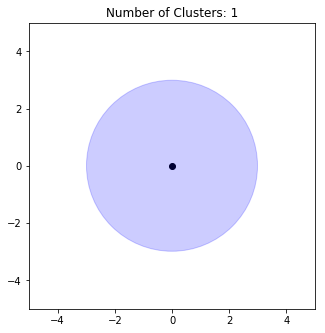

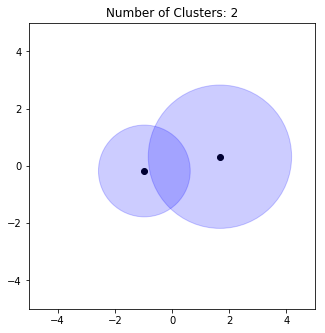

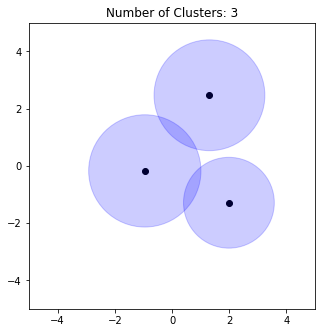

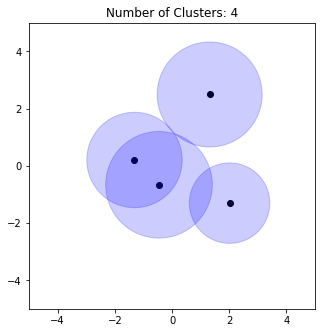

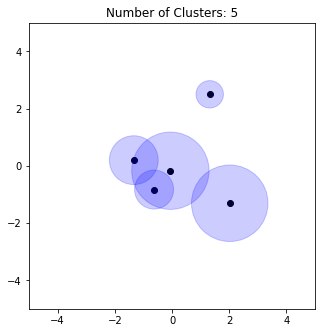

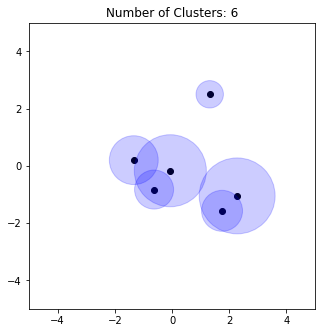

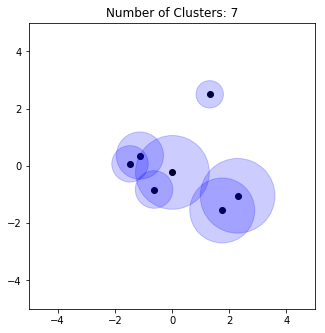

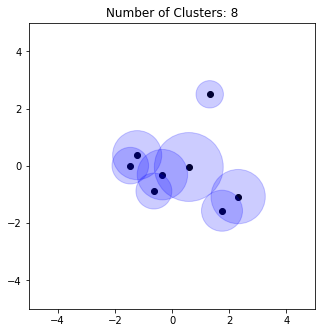

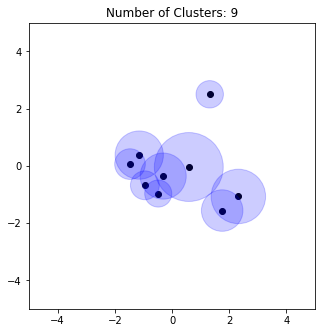

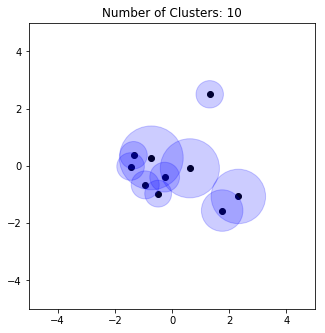

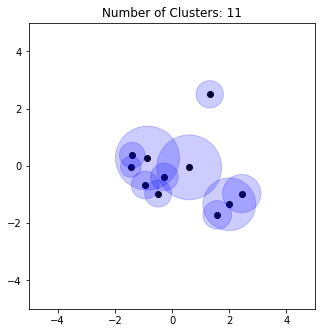

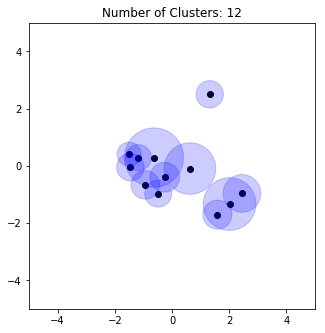

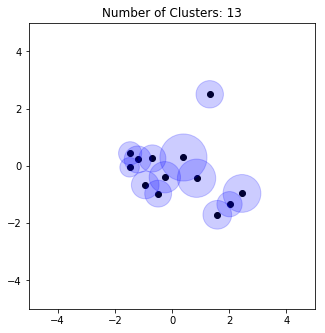

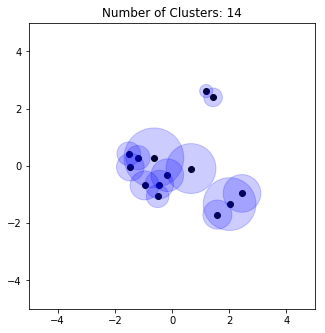

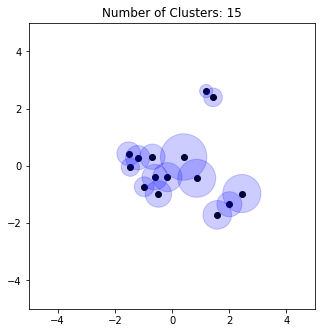

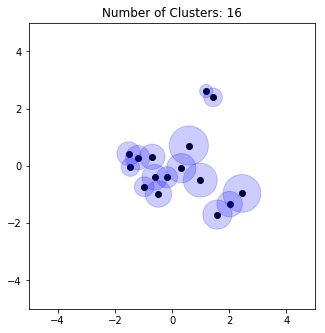

In [70]:
def P3(n_clusters=2):
    
### STUDENT START ###
    
    for cluster_num in range(n_clusters):
        
        fig = plt.figure(figsize=(100, 100))
        kmeans = KMeans(n_clusters=cluster_num+1, random_state=0)
        clusters = kmeans.fit(prin_comp)

        dists = kmeans.transform(prin_comp) 
        y_kmeans = kmeans.predict(prin_comp) 
        centers = kmeans.cluster_centers_
        print('\nNumber of clusters: ', cluster_num+1)
        
        ax=plt.subplot(n_clusters, 1, cluster_num+1, aspect='equal')
        for k in range(cluster_num+1):
        
            center = centers[k]
            cluster_dists = dists[np.where(y_kmeans==k)]
            max_distance = np.max(cluster_dists[:,k])
            print('\nCluster center for cluster number: ',k+1, 'is [{:.3f},{:.3f}]'.format(center[0],center[1]))
            print('The radius (max_distance) is {:.3f}'.format(max_distance))
            ax.axis([-5, 5, -5, 5])
            plt.scatter(center[0], center[1], color='black')
            circle = plt.Circle(center, max_distance,color='blue', alpha=0.2)
            ax.add_artist(circle)
            ax.set_title('Number of Clusters: ' + str(k+1))


        
### STUDENT END ###

P3(16)

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

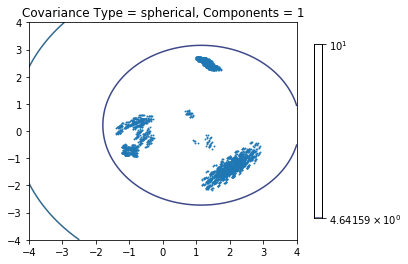

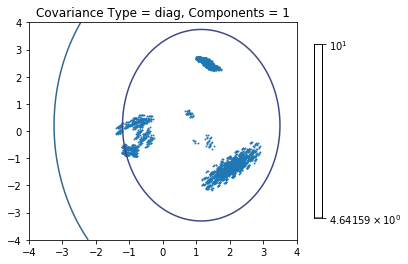

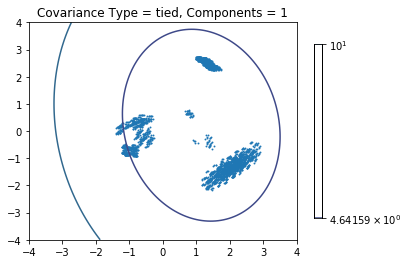

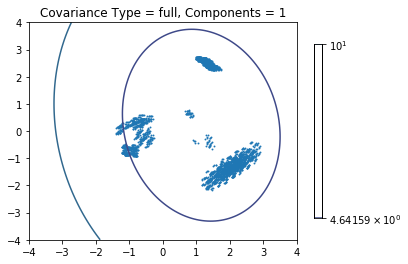

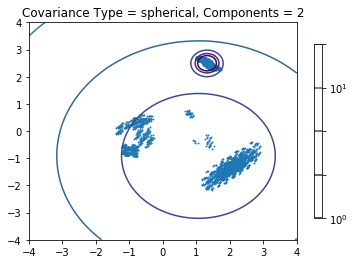

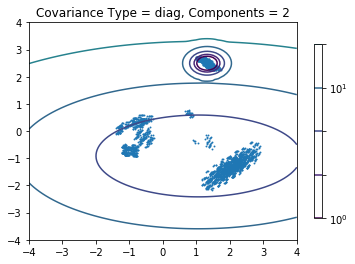

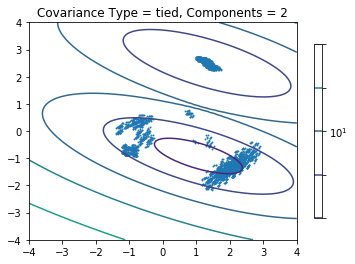

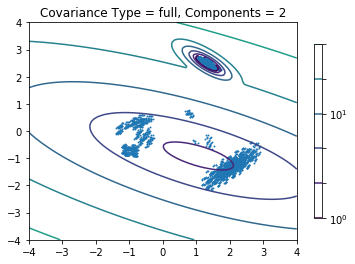

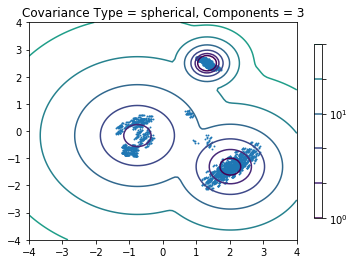

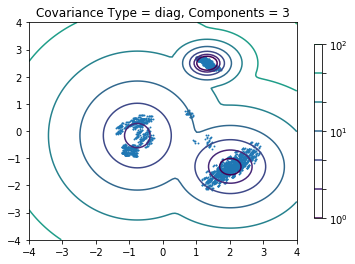

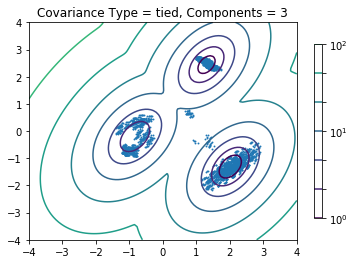

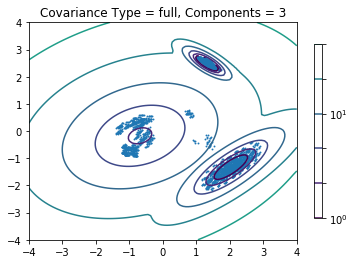

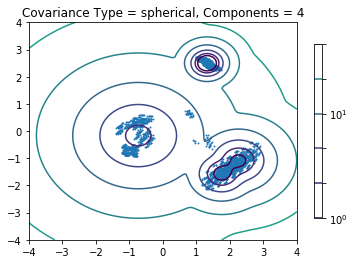

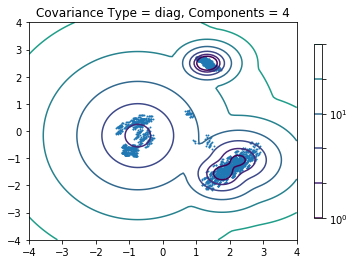

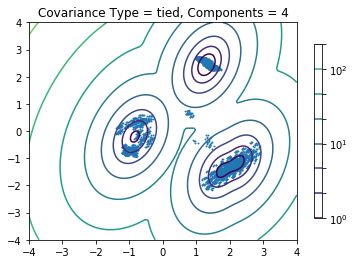

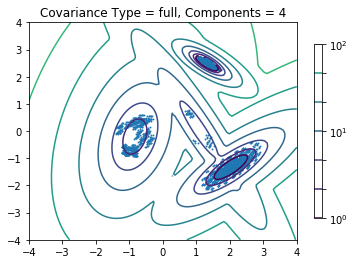

In [71]:
def P4(comps=1):
    
### STUDENT START ###
    poisonous = prin_comp[np.where(train_labels==1)]
    covariance_types = ['spherical', 'diag', 'tied', 'full']
    for comp in range(comps):
        for covar_type in covariance_types:
            gm_mod = GMM(n_components = comp+1,covariance_type = covar_type )
            clf = gm_mod.fit(poisonous)
            y_hat = gm_mod.predict(poisonous)

            x = np.linspace(-4.0, 4.0, 100)
            y = np.linspace(-4.0, 4.0, 100)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -clf.score(XX)
            Z = Z.reshape(X.shape)

            plt.figure()
            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            plt.scatter(poisonous[:, 0], poisonous[:, 1], .8)

            plt.title('Covariance Type = ' + covar_type + ', Components = ' + str(comp+1))
            plt.axis('tight')
            plt.show()
        
### STUDENT END ###

P4(4)

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [72]:
def P5():
    
### STUDENT START ###
    prin_comp = PCA(n_components=2)
    prin_comp.fit(train_data)
    
    train_data_p5 = prin_comp.transform(train_data)
    test_data_p5 = prin_comp.transform(test_data)
    
    poisonous = train_data_p5[np.where(train_labels==1)]
    non_poisonous = train_data_p5[np.where(train_labels==0)]
    
    
    gm_mod = GMM(n_components = 4,covariance_type = 'full' )
    clf = gm_mod.fit(poisonous)
    prob_poisonous = gm_mod.score(test_data_p5)
    
    clf = gm_mod.fit(non_poisonous)
    prob_non_poisonous = gm_mod.score(test_data_p5)
    
    prediction = (prob_poisonous >= prob_non_poisonous).astype(int)
    
    accuracy = np.sum(prediction==test_labels).astype(float) / test_labels.size
    print('{:.3f}'.format(accuracy))
    

### STUDENT END ###

P5()

0.951


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [73]:
def P6():
### STUDENT START ###
    no_of_pca = 50
    no_of_components = 50
    covariance_types = ['spherical', 'diag', 'tied', 'full']
    
    best_accuracy = 0.0
    best_feature = 0
    best_covariance = ''
    best_components = 0
    
    
    for pca in range(no_of_pca):
        pca+=1
        prin_comp = PCA(n_components = pca)
        prin_comp.fit(train_data)
        train_data_p6 = prin_comp.transform(train_data)
        test_data_p6 = prin_comp.transform(test_data)
        poisonous = train_data_p6[np.where(train_labels == 1)]
        non_poisonous = train_data_p6[np.where(train_labels == 0)]
        
        for components in range(no_of_components):
            components+=1
            for covariance_type in covariance_types:
                if covariance_type == 'spherical':
                    features = 1
                elif covariance_type == 'diag':
                    features = pca
                elif covariance_type == 'tied':
                     features = pca +1
                else:
                    features = pca*(pca+1)/2
                
                if ((pca +  features)* components * 2) < 50:
                                    
                    gm_mod = GMM(n_components=components, covariance_type=covariance_type)
                    clf = gm_mod.fit(poisonous)
                    prob_poisonous = gm_mod.score(test_data_p6)

                    clf = gm_mod.fit(non_poisonous)
                    prob_non_poisonous = gm_mod.score(test_data_p6)

                    predictions = (prob_poisonous >= prob_non_poisonous).astype(int) 
                    accuracy = np.sum(predictions == test_labels).astype(float) / test_labels.size
                    print('\nFeatures: ' , pca , '; Covariance Type : ', covariance_type , '; No of Components : ' , components )
                    print('Accuracy {:.3f}'.format(accuracy))
                    
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_feature = pca
                        best_covariance = covariance_type
                        best_components = components

            
    print('\nModel with best accuracy:')
    print('Accuracy {:.3f}'.format(best_accuracy))
    print('Features: ', best_feature)
    print('Covariance: ',best_covariance )
    print('Components: ', best_components)

### STUDENT END ###

P6()


Features:  1 ; Covariance Type :  spherical ; No of Components :  1
Accuracy 0.844

Features:  1 ; Covariance Type :  diag ; No of Components :  1
Accuracy 0.844

Features:  1 ; Covariance Type :  tied ; No of Components :  1
Accuracy 0.844

Features:  1 ; Covariance Type :  full ; No of Components :  1
Accuracy 0.844

Features:  1 ; Covariance Type :  spherical ; No of Components :  2
Accuracy 0.899

Features:  1 ; Covariance Type :  diag ; No of Components :  2
Accuracy 0.899

Features:  1 ; Covariance Type :  tied ; No of Components :  2
Accuracy 0.884

Features:  1 ; Covariance Type :  full ; No of Components :  2
Accuracy 0.899

Features:  1 ; Covariance Type :  spherical ; No of Components :  3
Accuracy 0.903

Features:  1 ; Covariance Type :  diag ; No of Components :  3
Accuracy 0.903

Features:  1 ; Covariance Type :  tied ; No of Components :  3
Accuracy 0.907

Features:  1 ; Covariance Type :  full ; No of Components :  3
Accuracy 0.903

Features:  1 ; Covariance Type :  sp


Features:  6 ; Covariance Type :  diag ; No of Components :  2
Accuracy 0.937

Features:  6 ; Covariance Type :  spherical ; No of Components :  3
Accuracy 0.968

Features:  7 ; Covariance Type :  spherical ; No of Components :  1
Accuracy 0.876

Features:  7 ; Covariance Type :  diag ; No of Components :  1
Accuracy 0.911

Features:  7 ; Covariance Type :  tied ; No of Components :  1
Accuracy 0.965

Features:  7 ; Covariance Type :  spherical ; No of Components :  2
Accuracy 0.881

Features:  7 ; Covariance Type :  spherical ; No of Components :  3
Accuracy 0.973

Features:  8 ; Covariance Type :  spherical ; No of Components :  1
Accuracy 0.875

Features:  8 ; Covariance Type :  diag ; No of Components :  1
Accuracy 0.914

Features:  8 ; Covariance Type :  tied ; No of Components :  1
Accuracy 0.963

Features:  8 ; Covariance Type :  spherical ; No of Components :  2
Accuracy 0.883

Features:  9 ; Covariance Type :  spherical ; No of Components :  1
Accuracy 0.875

Features:  9 ; C